In [1]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit.Chem import MCS
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import rdFMCS
from rdkit import rdBase

from rdkit.Chem import rdMolDescriptors

import numpy as np
import pandas as pd

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# 여기부터 시작

In [2]:
data= pd.read_csv('nib_172_kmeans.txt',sep="\t")

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
#data= pd.read_csv('scaffold_176_kmeans.txt')

In [4]:
data

,x,y,cluster,name,smiles
0,-0.194565,-0.054636,4,S_-TIPIFARNIB,Cn1cncc1[C@](N)(c1ccc(Cl)cc1)c1ccc2c(c1)c(-c1c...
1,-0.309891,-0.144591,4,11C_-SORAFENIB,CNC(=O)c1cc(Oc2ccc(N[11C](=O)Nc3ccc(Cl)c(C(F)(...
2,0.137404,-0.235080,0,5-_11C_methoxy-sunitinib,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(O...
3,0.150344,-0.250651,0,5-iodo-sunitinib,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(I...
4,0.137404,-0.235080,0,5-methoxy-sunitinib,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(O...
...,...,...,...,...,...
167,-0.176218,-0.001369,4,VATALANIB,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1
168,0.197757,0.010397,3,VECABRUTINIB,NC(=O)[C@H]1CCN(c2ncnc(N)c2F)C[C@@H]1N1CCC[C@@...
169,-0.122549,-0.106374,4,VEMURAFENIB,CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4cc...
170,0.121487,-0.216752,0,VOROLANIB,Cc1[nH]c(/C=C2\C(=O)Nc3ccc(F)cc32)c(C)c1C(=O)N...


In [5]:
group0 = data['cluster'] == 0
group1 = data['cluster'] == 1
group2 = data['cluster'] == 2
group3 = data['cluster'] == 3
group4 = data['cluster'] == 4

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
group0=data[group0]
group1=data[group1]
group2=data[group2]
group3=data[group3]
group4=data[group4]

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
group4

,x,y,cluster,name,smiles
0,-0.194565,-0.054636,4,S_-TIPIFARNIB,Cn1cncc1[C@](N)(c1ccc(Cl)cc1)c1ccc2c(c1)c(-c1c...
1,-0.309891,-0.144591,4,11C_-SORAFENIB,CNC(=O)c1cc(Oc2ccc(N[11C](=O)Nc3ccc(Cl)c(C(F)(...
10,-0.218390,-0.083752,4,AGERAFENIB,COc1cc2ncnc(Oc3cccc(NC(=O)Nc4cc(C(C)(C)C(F)(F)...
13,-0.264110,0.032570,4,ALLITINIB,C=CC(=O)Nc1ccc2ncnc(Nc3ccc(OCc4cccc(F)c4)c(Cl)...
19,-0.291621,-0.072288,4,AXITINIB,CNC(=O)c1ccccc1Sc1ccc2c(/C=C/c3ccccn3)n[nH]c2c1
30,-0.232740,0.014577,4,CABOZANTINIB,COc1cc2nccc(Oc3ccc(NC(=O)C4(C(=O)Nc5ccc(F)cc5)...
32,-0.218105,0.006277,4,CAPMATINIB,CNC(=O)c1ccc(-c2cnc3ncc(Cc4ccc5ncccc5c4)n3n2)cc1F
36,-0.314615,-0.014683,4,CHIAURANIB,COC1=CC2=NC=CC(=C2C=C1)OC3=CC4=C(C=C3)C(=CC=C4...
40,-0.174059,-0.134430,4,DABRAFENIB,CC(C)(C)c1nc(-c2cccc(NS(=O)(=O)c3c(F)cccc3F)c2...
49,-0.309891,-0.144591,4,DONAFENIB,[2H]C([2H])([2H])NC(=O)c1cc(Oc2ccc(NC(=O)Nc3cc...


In [32]:
smiles_list=group4['smiles']

In [33]:
mol_list=[]
for smiles in smiles_list:
    mol=Chem.MolFromSmiles(smiles)
    mol_list.append(mol)

In [34]:
res=MCS.FindMCS(mol_list)

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  """Entry point for launching an IPython kernel.


In [35]:
patt = Chem.MolFromSmarts(res.smarts)

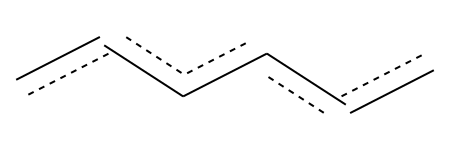

In [36]:
patt

In [13]:
patt_sms= Chem.MolToSmiles(patt)

In [14]:
patt_sms

'C:C:C:C:C'

In [15]:
smiles_list

2      CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(O...
3      CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(I...
4      CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(O...
16     CC1=CC2=C(N1)C=CC(=C2F)OC3=C4C=C(C(=CC4=NC=C3)...
17     O=C(Nc1ccc(OC(F)(F)Cl)cc1)c1cnc(N2CC[C@@H](O)C...
24         Cn1cnc2c(F)c(Nc3ccc(Br)cc3F)c(C(=O)NOCCO)cc21
29     Cc1cc2c(F)c(Oc3ncnn4cc(OC[C@@H](C)O)c(C)c34)cc...
35     Cc1cc(Nc2ncc(Cl)c(Nc3ccccc3S(=O)(=O)C(C)C)n2)c...
43     CC[C@@](C)(Nc1ccnc(-c2c[nH]c3ncccc23)n1)C(=O)N...
44     CNC(=O)c1ccc(Nc2ncc(C(F)(F)F)c(NCc3nccnc3N(C)S...
47     COC(=O)Nc1nc2cc(Sc3ccc(NC(=O)[C@H](C)N)cc3)ccc...
53     CC(C)(O)CNc1nc(Nc2ccnc(C(F)(F)F)c2)nc(-c2cccc(...
54     COC(=O)N[C@@H](C)CNc1nccc(-c2cn(C(C)C)nc2-c2cc...
55     C[C@H]1CN(C(=O)c2ccc(NC(=O)c3cc(O[C@H](C)c4c(C...
67     COC1=C(C2=C(C=C1)NC(=CC2=O)C3=CC(=CC=C3)F)OP(=...
68     COc1cc(Nc2ncc(F)c(Nc3ccc4c(n3)N(COP(=O)(O)O)C(...
87     COc1cc2nccc(Oc3ccc(NC(=O)NC4CC4)c(Cl)c3)c2cc1C...
92     C[C@H]1Oc2cc(cnc2N)-c2c(

In [16]:
len(smiles_list)

33